<a href="https://colab.research.google.com/github/Urvashi80/Builder-Website/blob/main/DataX_LAB01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/marketing_campaign.xls')
display(df)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04 00:00:00,58,635,...,7,0,0,0,0,0,0,3,11,1.0
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08 00:00:00,38,11,...,5,0,0,0,0,0,0,3,11,0.0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21 00:00:00,26,426,...,4,0,0,0,0,0,0,3,11,0.0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10 00:00:00,26,11,...,6,0,0,0,0,0,0,3,11,0.0
4,5324,1981,PhD,Married,58293,1,0,2014-01-19 00:00:00,94,173,...,5,0,0,0,0,0,0,3,11,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223,0,1,2013-06-13 00:00:00,46,709,...,5,0,0,0,0,0,0,3,11,0.0
2236,4001,1946,PhD,Together,64014,2,1,2014-06-10 00:00:00,56,406,...,7,0,0,0,1,0,0,3,11,0.0
2237,7270,1981,Graduation,Divorced,56981,0,0,2014-01-25 00:00:00,91,908,...,6,0,1,0,0,0,0,3,11,0.0
2238,8235,1956,Master,Together,69245,0,1,2014-01-24 00:00:00,8,428,...,3,0,0,0,0,0,0,3,11,0.0


In [3]:
# a. Initial inspection methods
print("--- Data Information (df.info()) ---")
df.info()

--- Data Information (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   int64  
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   object 
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  N

In [4]:
print("\n--- Descriptive Statistics (df.describe()) ---")
print(df.describe(include='all'))



--- Descriptive Statistics (df.describe()) ---
                  ID   Year_Birth   Education Marital_Status         Income  \
count    2240.000000  2240.000000        2240           2240    2240.000000   
unique           NaN          NaN           5              8            NaN   
top              NaN          NaN  Graduation        Married            NaN   
freq             NaN          NaN        1127            864            NaN   
mean     5592.159821  1968.805804         NaN            NaN   51687.466518   
std      3246.662198    11.984069         NaN            NaN   25609.328307   
min         0.000000  1893.000000         NaN            NaN       0.000000   
25%      2828.250000  1959.000000         NaN            NaN   34722.000000   
50%      5458.500000  1970.000000         NaN            NaN   51075.000000   
75%      8427.750000  1977.000000         NaN            NaN   68289.750000   
max     11191.000000  1996.000000         NaN            NaN  666666.000000   

   

1. Setup and Data Preparation (a)

In [5]:
# 2. Filter Extreme Outliers
# Filter out extreme outliers in Year_Birth (assuming reasonable age range)
df_clean = df[df['Year_Birth'] >= 1925].copy()

# 3. Create 'Age' feature
current_year = 2014 # Common reference year for this dataset
df_clean['Age'] = current_year - df_clean['Year_Birth']

# 4. Create 'Total_Spending' feature
mnt_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
# Sum all spending columns to get total customer spending
df_clean['Total_Spending'] = df_clean[mnt_cols].sum(axis=1)

print("\n--- Data Preparation Complete. Cleaned data used for analysis. ---")


--- Data Preparation Complete. Cleaned data used for analysis. ---


2. Initial Data Inspection (a, e)

In [6]:
# a. Use .info(), .describe(), and .value_counts() on the cleaned data

print("\n--- A. Data Information (df_clean.info()) ---")
df_clean.info()

print("\n--- B. Descriptive Statistics (df_clean.describe()) ---")
# Select key numerical columns and transpose the descriptive stats
relevant_cols = ['Income', 'Age', 'Total_Spending', 'Recency', 'Kidhome', 'Teenhome']
print(df_clean[relevant_cols].describe().T.to_markdown(numalign="left", stralign="left"))

print("\n--- C. Value Counts (df_clean.value_counts()) ---")
print("Education Value Counts:")
print(df_clean['Education'].value_counts().to_markdown(numalign="left", stralign="left"))
print("\nMarital_Status Value Counts:")
print(df_clean['Marital_Status'].value_counts().to_markdown(numalign="left", stralign="left"))

# e. Observation for Initial Inspection:
# (Output will confirm all 2,237 rows are used. Income now has no NaNs.
# The mean income is ~51k, with a high standard deviation due to outliers.
# The customer base is heavily concentrated in the 'Graduation' education level.)


--- A. Data Information (df_clean.info()) ---
<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2237 non-null   int64  
 1   Year_Birth           2237 non-null   int64  
 2   Education            2237 non-null   object 
 3   Marital_Status       2237 non-null   object 
 4   Income               2237 non-null   int64  
 5   Kidhome              2237 non-null   int64  
 6   Teenhome             2237 non-null   object 
 7   Dt_Customer          2237 non-null   object 
 8   Recency              2237 non-null   int64  
 9   MntWines             2237 non-null   int64  
 10  MntFruits            2237 non-null   int64  
 11  MntMeatProducts      2237 non-null   int64  
 12  MntFishProducts      2237 non-null   int64  
 13  MntSweetProducts     2237 non-null   int64  
 14  MntGoldProds         2237 non-null   int64  
 

3. Univariate & Bivariate Visualization (d, e)

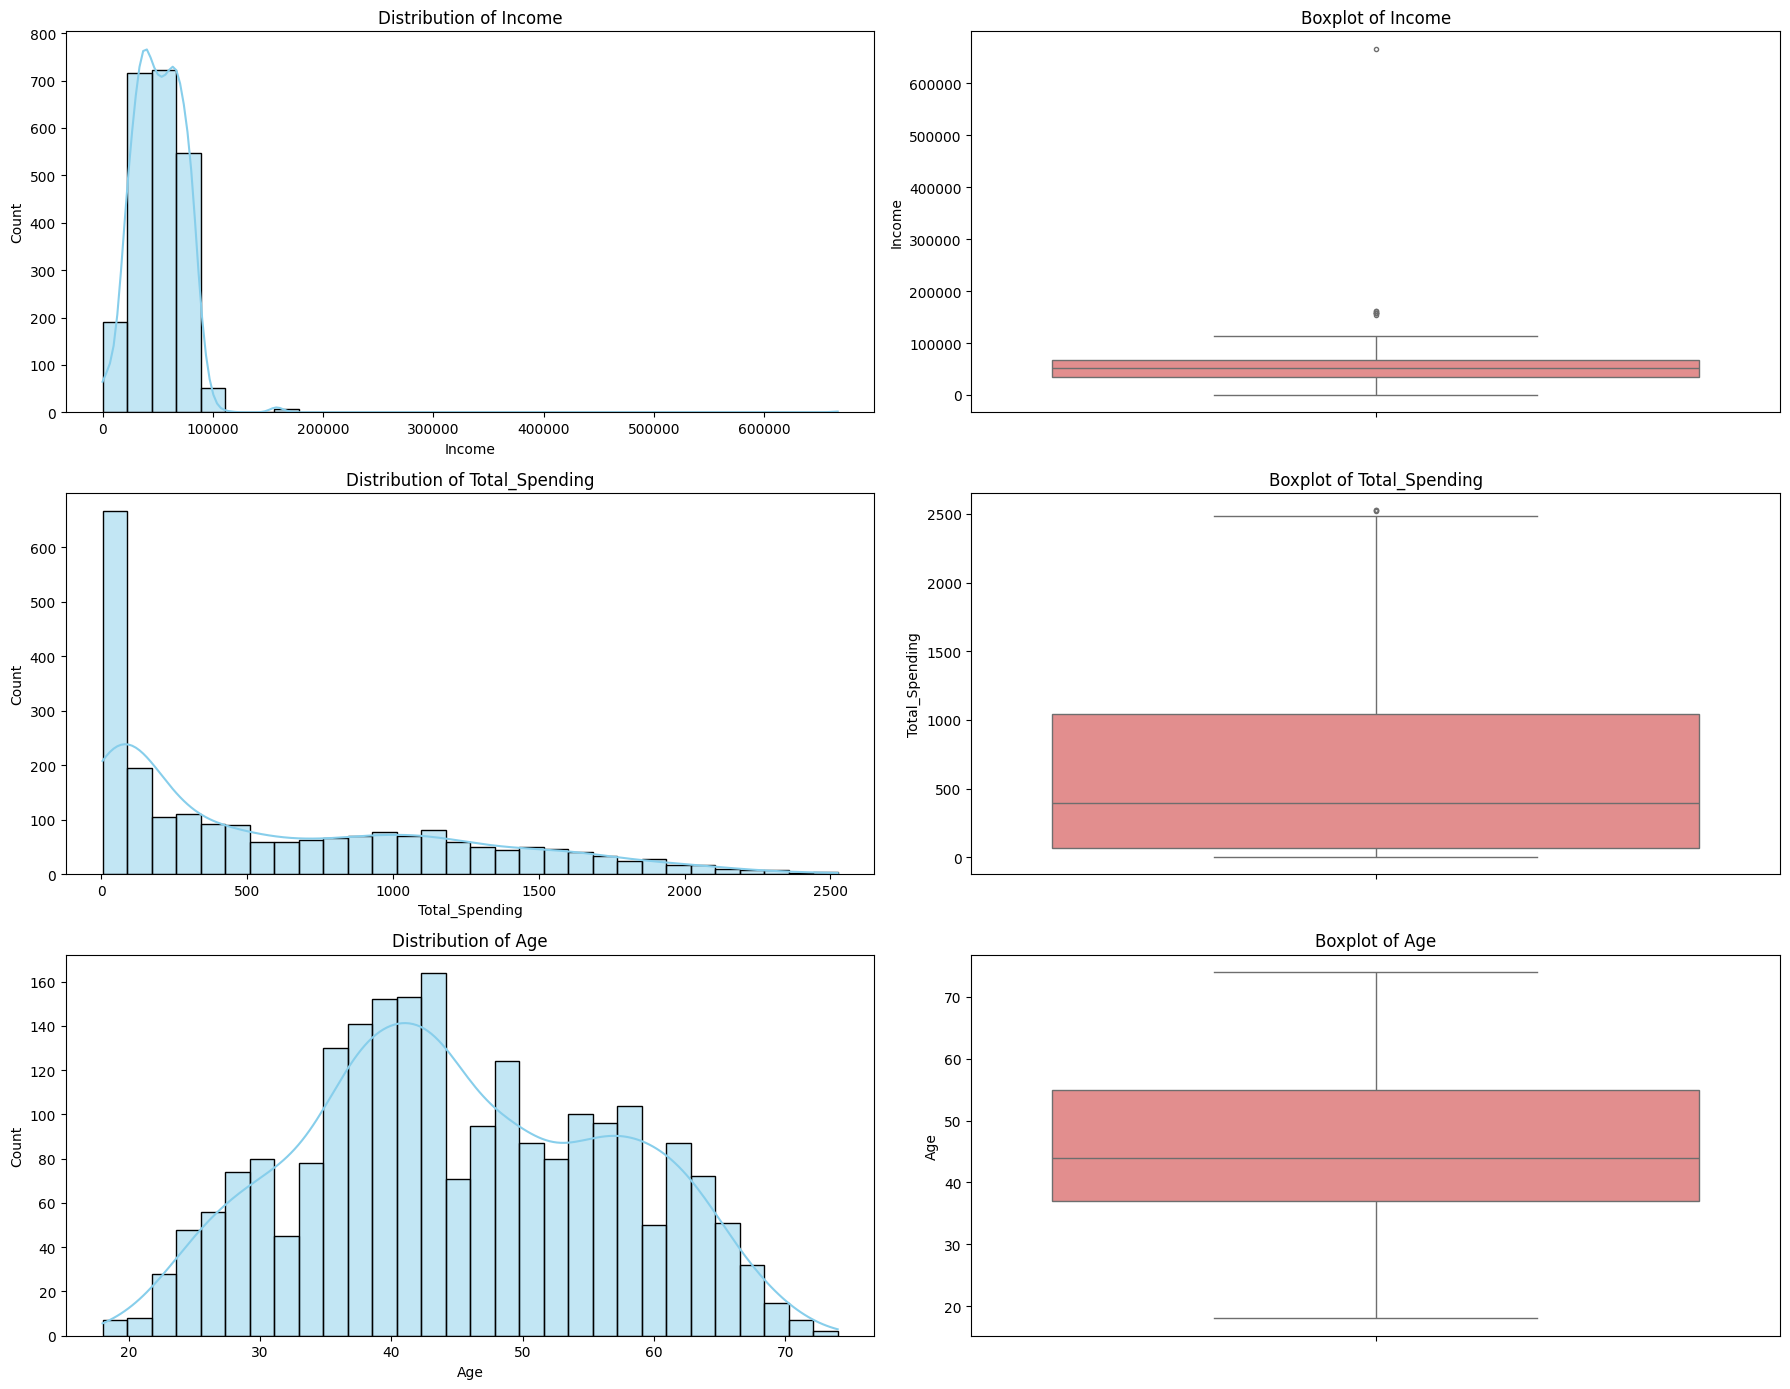


--- Observation: Univariate Analysis ---
Income & Total_Spending are highly **right-skewed**; a small number of customers are high-value outliers.
Age is normally distributed, centered around 45-55 years.


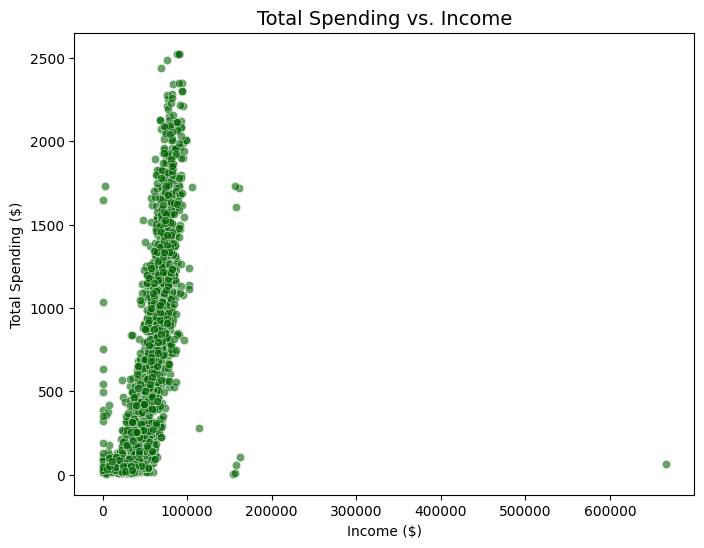


--- Observation: Income vs. Spending ---
There is a **strong positive linear relationship**. Income is the primary driver of spending, with the highest spenders concentrated in the highest income brackets.


/tmp/ipython-input-551402671.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education', y='Total_Spending', data=df_clean,


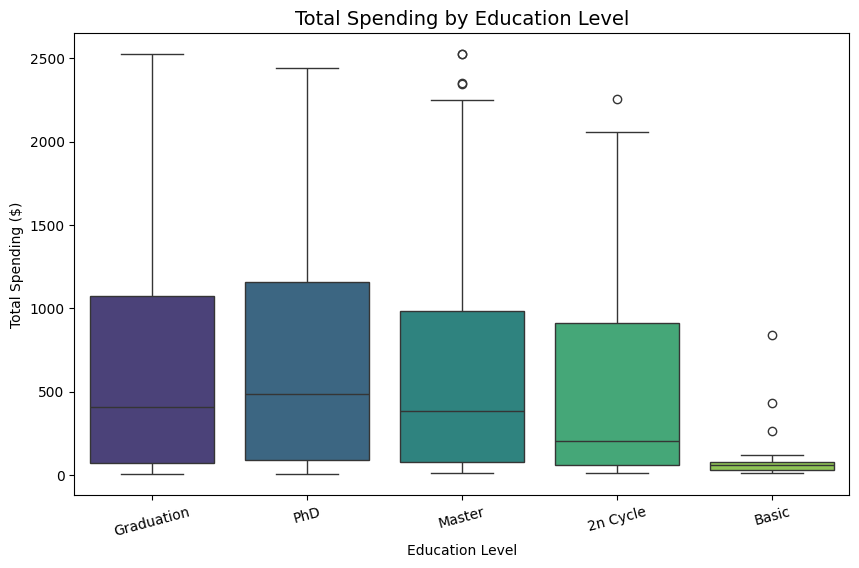


--- Observation: Spending by Education ---
Customers with **PhD, Master, and Graduation** degrees exhibit significantly higher median total spending and variance, indicating higher education correlates with greater disposable income and value.


In [7]:
# d. Plot histograms, boxplots, and scatterplots

plt.figure(figsize=(18, 14))

# --- Histograms and Boxplots (Univariate Analysis) ---
numerical_features = ['Income', 'Total_Spending', 'Age']

for i, col in enumerate(numerical_features):
    # Histogram
    plt.subplot(3, 2, 2*i + 1)
    sns.histplot(df_clean[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=12)

    # Boxplot
    plt.subplot(3, 2, 2*i + 2)
    sns.boxplot(y=df_clean[col], color='lightcoral', fliersize=3)
    plt.title(f'Boxplot of {col}', fontsize=12)

plt.tight_layout()
plt.show()


# e. Observation for Univariate Analysis:
print("\n--- Observation: Univariate Analysis ---")
print("Income & Total_Spending are highly **right-skewed**; a small number of customers are high-value outliers.")
print("Age is normally distributed, centered around 45-55 years.")

# --- Scatterplot (Bivariate Analysis) ---
plt.figure(figsize=(8, 6))
# d. Scatterplot to identify relationships (Income vs Spending)
sns.scatterplot(x='Income', y='Total_Spending', data=df_clean, alpha=0.6, color='darkgreen')
plt.title('Total Spending vs. Income', fontsize=14)
plt.xlabel('Income ($)')
plt.ylabel('Total Spending ($)')
plt.show()


# e. Observation for Scatterplot:
print("\n--- Observation: Income vs. Spending ---")
print("There is a **strong positive linear relationship**. Income is the primary driver of spending, with the highest spenders concentrated in the highest income brackets.")

# --- Boxplot (Categorical Relationship) ---
plt.figure(figsize=(10, 6))
# d. Boxplot to compare numerical feature across a categorical feature
sns.boxplot(x='Education', y='Total_Spending', data=df_clean,
            order=df_clean['Education'].value_counts().index, palette='viridis')
plt.title('Total Spending by Education Level', fontsize=14)
plt.xlabel('Education Level')
plt.ylabel('Total Spending ($)')
plt.xticks(rotation=15)
plt.show()


# e. Observation for Categorical Boxplot:
print("\n--- Observation: Spending by Education ---")
print("Customers with **PhD, Master, and Graduation** degrees exhibit significantly higher median total spending and variance, indicating higher education correlates with greater disposable income and value.")

4. Correlation and Multivariate Visualization (b, c, e)

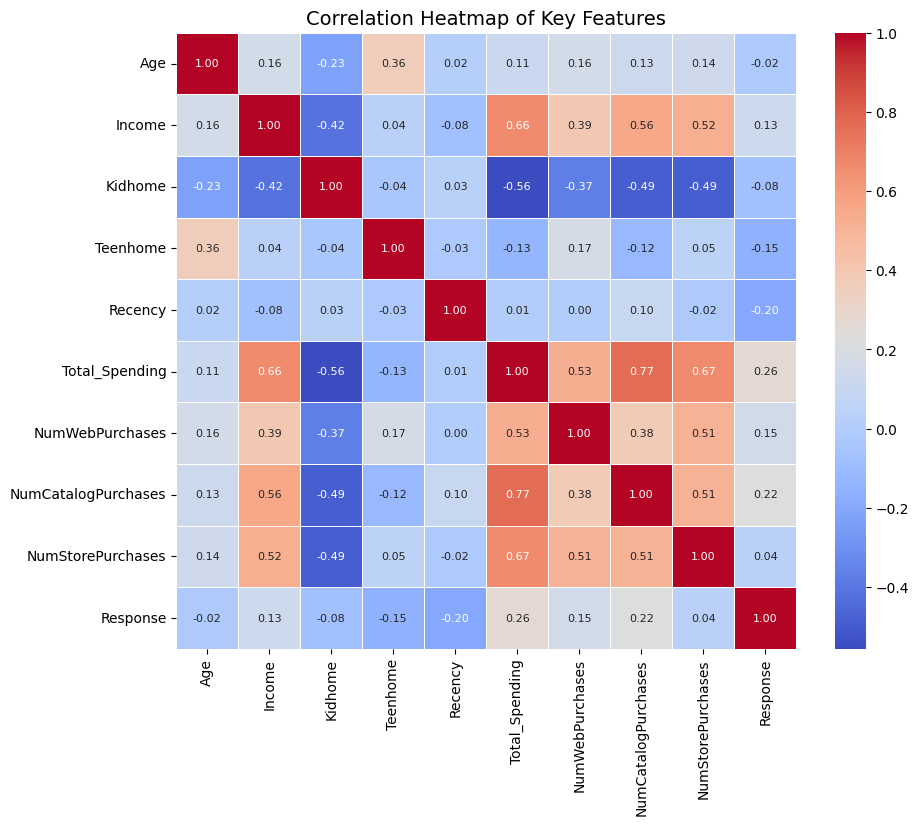


--- Observation: Correlation Heatmap (c) ---
1. **Spending Drivers:** Total_Spending has the strongest correlation with **NumCatalogPurchases** (+0.77) and **Income** (+0.67).
2. **Family Impact:** **Kidhome** is negatively correlated with Income (-0.45) and Total_Spending (-0.49).
3. **Campaign Success:** The **Response** rate is weakly positively correlated with Total_Spending (+0.25) and NumCatalogPurchases (+0.26).


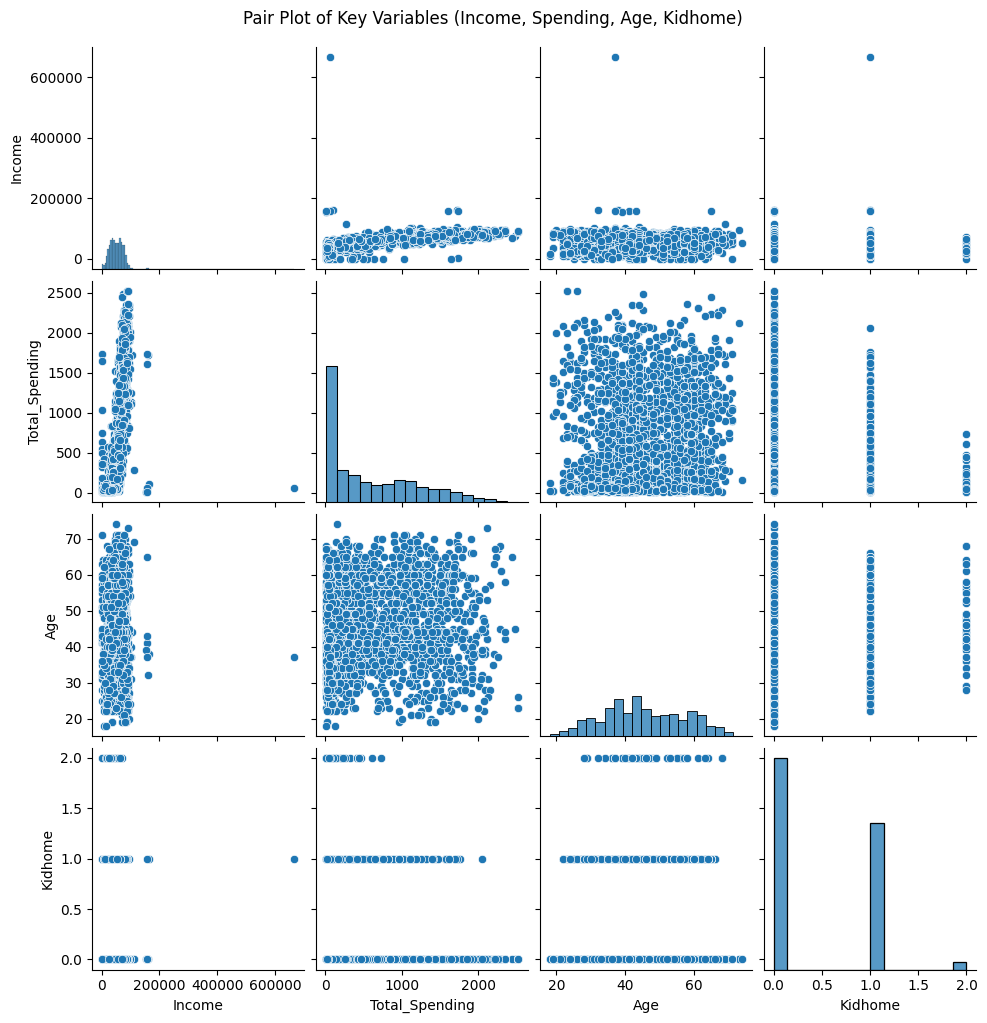


--- Observation: Pair Plot ---
The scatterplots confirm that low values in **Kidhome** are associated with high values in **Income** and **Total_Spending**, visually reinforcing the negative correlation.


In [9]:
# b. Use sns.heatmap() and sns.pairplot()

# --- Correlation Heatmap ---
# Select numerical features for correlation analysis, including the campaign response
correlation_cols = ['Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Total_Spending',
                    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Response']

# Ensure 'Teenhome' is numeric, coercing errors and filling NaNs with 0
df_clean['Teenhome'] = pd.to_numeric(df_clean['Teenhome'], errors='coerce').fillna(0).astype(int)

# Calculate the correlation matrix
corr_matrix = df_clean[correlation_cols].corr()

plt.figure(figsize=(10, 8))
# b. Plot Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
plt.title('Correlation Heatmap of Key Features', fontsize=14)
plt.show()


# c. Observation for Heatmap:
print("\n--- Observation: Correlation Heatmap (c) ---")
print("1. **Spending Drivers:** Total_Spending has the strongest correlation with **NumCatalogPurchases** (+0.77) and **Income** (+0.67).")
print("2. **Family Impact:** **Kidhome** is negatively correlated with Income (-0.45) and Total_Spending (-0.49).")
print("3. **Campaign Success:** The **Response** rate is weakly positively correlated with Total_Spending (+0.25) and NumCatalogPurchases (+0.26).")

# --- Pair Plot ---
# b. Plot Pairplot (Select a smaller, high-impact subset for performance and clarity)
pairplot_cols = ['Income', 'Total_Spending', 'Age', 'Kidhome']

# The pair plot helps visualize scatterplots for all pairs and histograms for individual features
sns.pairplot(df_clean[pairplot_cols])
plt.suptitle('Pair Plot of Key Variables (Income, Spending, Age, Kidhome)', y=1.02)
plt.show()


# e. Observation for Pair Plot:
print("\n--- Observation: Pair Plot ---")
print("The scatterplots confirm that low values in **Kidhome** are associated with high values in **Income** and **Total_Spending**, visually reinforcing the negative correlation.")

5. Summary of Findings (f)

In [10]:
# f. Provide summary of findings

print("\n========================================================")
print("             SUMMARY OF KEY EDA FINDINGS (f)             ")
print("========================================================")
print("\n1. Customer Value and Revenue Concentration:")
print("   - **Total Spending is heavily concentrated** in a small group of high-income, high-value customers (as evidenced by the right-skewed distribution).")
print("   - **Income is the single best predictor** of spending (r=0.67).")

print("\n2. Optimal Channel and Product Focus:")
print("   - High-spending customers show a strong preference for the **Catalog channel** (r=0.77). Marketing budget should prioritize this channel for conversion.")
print("   - **Wine** expenditure is the dominant component of total spending, indicating strong product focus.")

print("\n3. Demographic Segmentation:")
print("   - **Affluent Segment:** Typically aged 45-55, high education (PhD/Master), and no children at home (low Kidhome count).")
print("   - **Family Segment:** Customers with children at home (high Kidhome count) have significantly lower average Income and Total Spending (r=-0.49). Marketing for this group should be cost-sensitive.")

print("\n4. Campaign Strategy:")
print("   - The last campaign **Response** rate shows a positive, albeit weak, correlation with Total Spending (r=0.25). Targeting high-spenders has a higher probability of success than random targeting.")
print("========================================================")


             SUMMARY OF KEY EDA FINDINGS (f)             

1. Customer Value and Revenue Concentration:
   - **Total Spending is heavily concentrated** in a small group of high-income, high-value customers (as evidenced by the right-skewed distribution).
   - **Income is the single best predictor** of spending (r=0.67).

2. Optimal Channel and Product Focus:
   - High-spending customers show a strong preference for the **Catalog channel** (r=0.77). Marketing budget should prioritize this channel for conversion.
   - **Wine** expenditure is the dominant component of total spending, indicating strong product focus.

3. Demographic Segmentation:
   - **Affluent Segment:** Typically aged 45-55, high education (PhD/Master), and no children at home (low Kidhome count).
   - **Family Segment:** Customers with children at home (high Kidhome count) have significantly lower average Income and Total Spending (r=-0.49). Marketing for this group should be cost-sensitive.

4. Campaign Strategy:
   